In [235]:
import sqlite3  # database operations
import pandas as pd  # data manipulation and analysis
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # enhanced visualizations
# Set a Seaborn theme
sns.set_theme(style='darkgrid', font_scale=1.2)

In [236]:
# Connect to SQLite database or create it if it doesn't exist
conn = sqlite3.connect('output/geo_data.db')

# Execute a query
query = 'SELECT * FROM geo_data'

# Fetch data into a Pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

In [237]:
# Display the first few rows of the DataFrame
df.head()

,date,agency_name,violation_code,violation_description,location,fine,paid,penalty,latitude,longitude,geometry
0,2024-09-01 10:20:00,US. BUREAU OF ENGRAVING AND PRINTNG,P012,DISOBEYING OFFICIAL SIGN,BLK ES 300 RAOUL WALLENBERG PL SW,30,30,0,38.886,-77.034,None
1,2024-09-08 10:51:00,US. BUREAU OF ENGRAVING AND PRINTNG,P170,FAILURE TO DISPLAY CURRENT TAGS,SS 1300 BLK C ST SW,100,0,0,38.886,-77.031,None
2,2024-09-08 11:08:00,US. BUREAU OF ENGRAVING AND PRINTNG,P170,FAILURE TO DISPLAY CURRENT TAGS,NS 1300 BLK D ST SW,100,0,0,38.885,-77.031,None
3,2024-09-08 11:11:00,US. BUREAU OF ENGRAVING AND PRINTNG,P170,FAILURE TO DISPLAY CURRENT TAGS,NS 1300 BLK D ST SW,100,0,0,38.885,-77.031,None
4,2024-09-08 11:13:00,US. BUREAU OF ENGRAVING AND PRINTNG,P170,FAILURE TO DISPLAY CURRENT TAGS,SS 1300 BLK D ST SW,100,0,0,38.885,-77.031,None


In [238]:
#BARPLOT FUNCTION
def valueCountBarPlot(column_name, title, xlabel, ylabel, file_name):
    # Prepare data for plotting
    if column_name == 'hour':
        value_counts = df[column_name].value_counts().reset_index()
        value_counts.columns = [column_name, 'count']
        value_counts = value_counts.sort_values(by=column_name)  # Sort by hour to ensure order from 0 to 23
    else:
        value_counts = df[df[column_name] != 0][column_name].value_counts().reset_index()  # exclude 0
        value_counts.columns = [column_name, 'count']

    # Create a barplot
    plt.figure(figsize=(12, 6))
    barplot = sns.barplot(data=value_counts, x=column_name, y='count', hue='count', palette='YlOrRd', legend=False)

    # Add counts on top of each bar
    [plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{int(bar.get_height()):,}', 
              ha='center', va='bottom', fontsize=12, fontweight='bold') for bar in barplot.patches]

    # Customize the plot
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    # Exclude 0 from displaying as y tick
    plt.yticks([tick for tick in plt.yticks()[0] if tick != 0])

    if column_name == 'hour':
        # Convert the x-axis ticks to AM/PM format
        labels = [f"{hour % 12 or 12} {'AM' if hour < 12 else 'PM'}" for hour in range(24)]  # Format labels as AM/PM
        plt.xticks(ticks=range(24), labels=labels)

        # Rotate x-axis labels to avoid overlap
        plt.xticks(rotation=45)
   

    #ensure tick marks are visible for seaborn
    plt.tick_params(axis='x', which='both', bottom=True)

    plt.tight_layout()

    # Save the plot as image
    plt.savefig(f'output/img/{file_name}')

    # Show the plot
    plt.show()




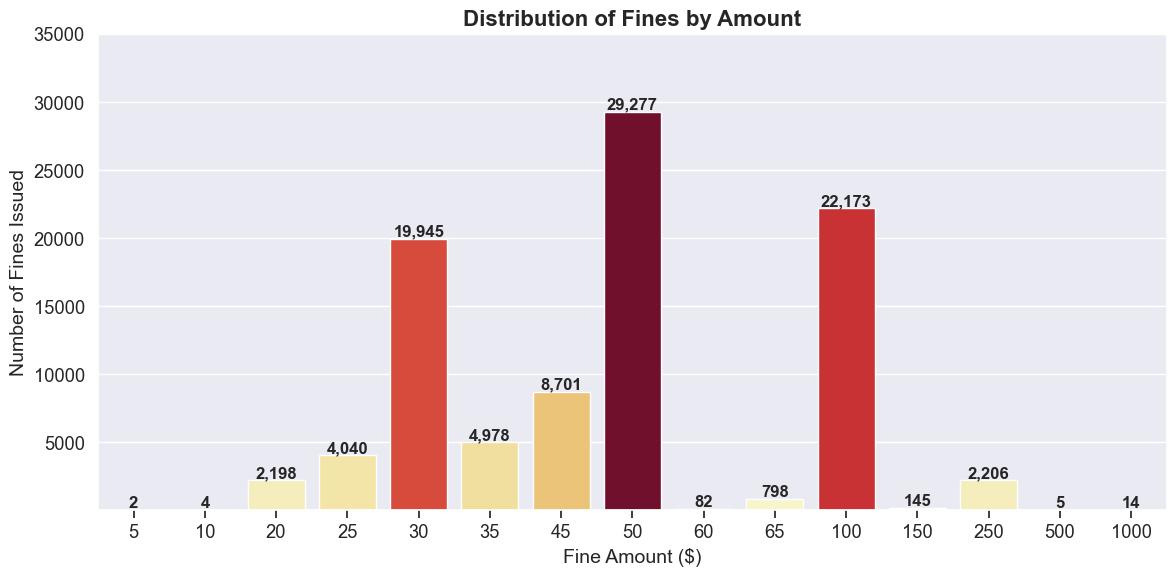

In [239]:
valueCountBarPlot('fine','Distribution of Fines by Amount','Fine Amount ($)','Number of Fines Issued','fine_distribution.png')

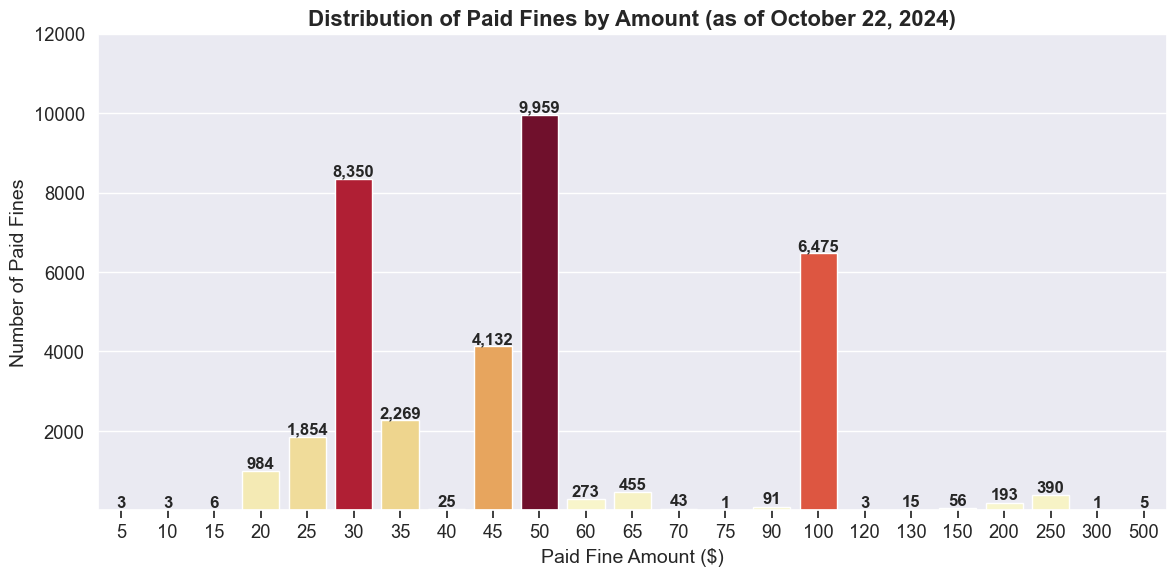

In [240]:
valueCountBarPlot('paid', 'Distribution of Paid Fines by Amount (as of October 22, 2024)', 'Paid Fine Amount ($)', 'Number of Paid Fines','paid_fines_distribution.png')

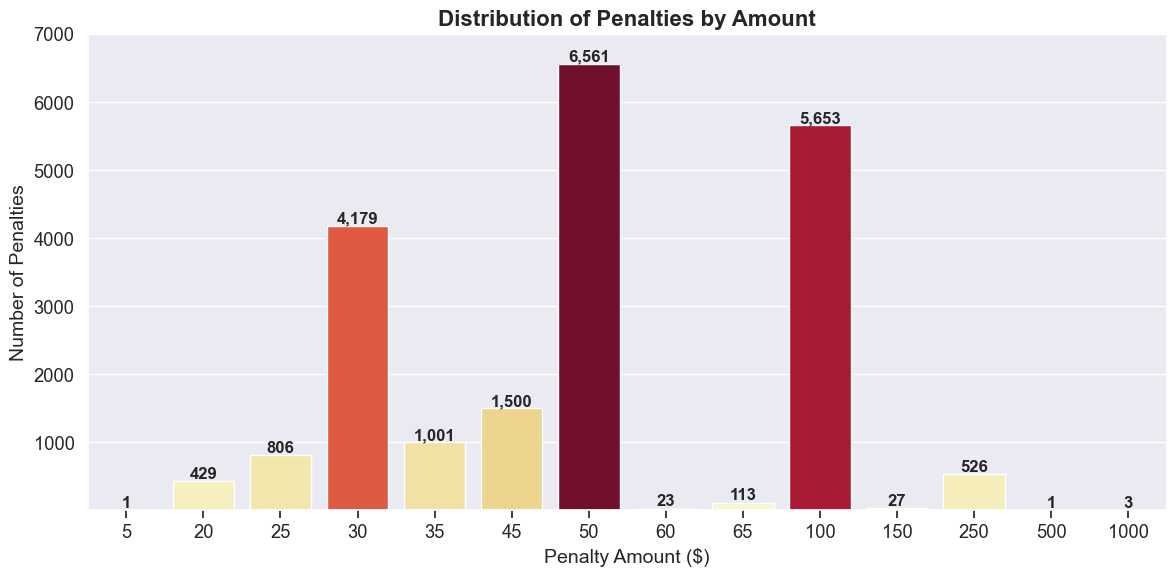

In [241]:
valueCountBarPlot('penalty', 'Distribution of Penalties by Amount', 'Penalty Amount ($)', 'Number of Penalties','penalty_distribution.png')

In [242]:
# Fee Insights

# Totals
total_violations = len(df)
total_paid = df['paid'].sum()
total_fines = df['fine'].sum()
total_penalties = df['penalty'].sum()
total_fees = total_fines + total_penalties

# Percentages
percent_fines = (total_fines / total_fees) * 100
percent_penalties = (total_penalties / total_fees) * 100
percent_paid = (total_paid / total_fees) * 100
percent_unpaid = 100 - percent_paid

# Averages
average_fine = total_fines / total_violations
average_penalty = total_penalties / total_violations
average_paid = total_paid / total_violations

# Print
print("Fee Insights (as of October 22, 2024):")
print("----------------------------------------------------")
print(f"Total Violations: {total_violations:,}\n") # :, adds commas to number in f string and \n adds newline
print(f"Total Fines: ${total_fines:,}")
print(f"Total Penalties: ${total_penalties:,}")
print(f"Total Amount of Fines and Penalties Issued: ${total_fees:,}")
print(f"Fines as Percentage of Total: {round(percent_fines, 1)}%")
print(f"Penalties as Percentage of Total: {round(percent_penalties, 1)}%\n")
print(f"Total Amount of Payments: ${total_paid:,}")
print(f"Percentage of Total Fees Paid: {round(percent_paid, 1)}%")
print(f"Percentage of Total Fees Unpaid: {round(percent_unpaid, 1)}%\n")
print(f"Average Fine Amount: ${round(average_fine, 2)}")
print(f"Average Penalty Amount: ${round(average_penalty, 2)}")
print(f"Average Amount Paid: ${round(average_paid, 2)}")


Fee Insights (as of October 22, 2024):
----------------------------------------------------
Total Violations: 94,589

Total Fines: $5,636,825
Total Penalties: $1,297,765
Total Amount of Fines and Penalties Issued: $6,934,590
Fines as Percentage of Total: 81.3%
Penalties as Percentage of Total: 18.7%

Total Amount of Payments: $1,935,310
Percentage of Total Fees Paid: 27.9%
Percentage of Total Fees Unpaid: 72.1%

Average Fine Amount: $59.59
Average Penalty Amount: $13.72
Average Amount Paid: $20.46


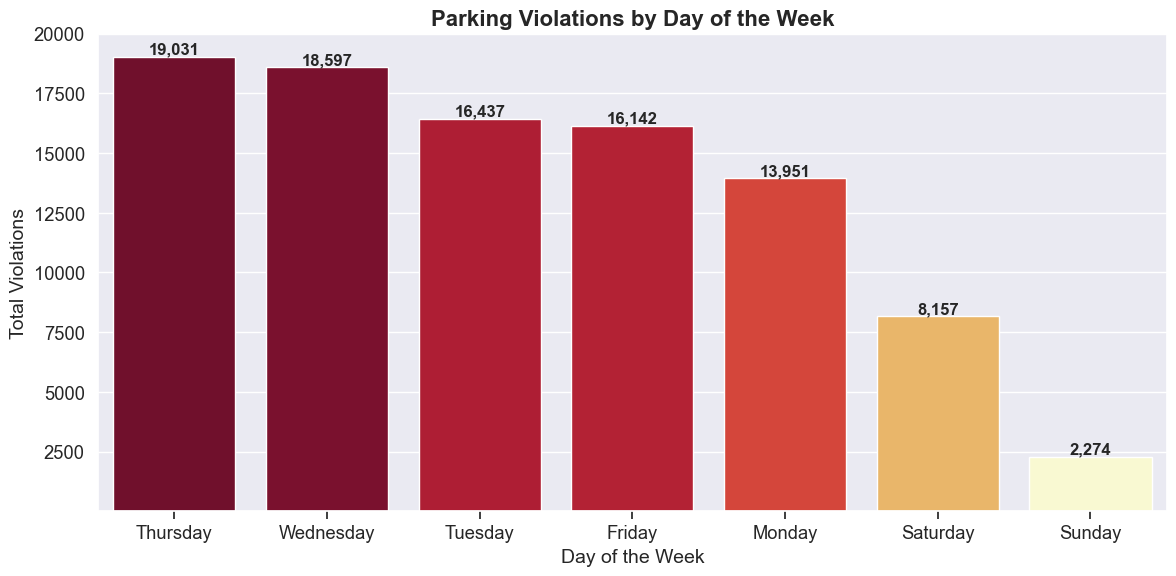

In [243]:
# What are the most frequent days and times for parking violations?

#def valueCountBarPlot(column_name,title,xlabel,ylabel,file_name):

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract day of week and hour from the datetime
df['day_of_week'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour

#Add time of day
def get_time_of_day(hour):
    if hour >= 0 and hour < 6:
        return 'Early Morning'
    elif hour >= 6 and hour < 12:
        return 'Morning'
    elif hour >= 12 and hour < 18:
        return 'Afternoon'
    elif hour >= 18 and hour < 21:
        return 'Evening'
    else:
        return 'Night'

#apply function to create new column
df['time_of_day'] = df['hour'].apply(get_time_of_day)

valueCountBarPlot('day_of_week', 'Parking Violations by Day of the Week', 'Day of the Week', 'Total Violations', 'parking_violations_by_weekday.png')

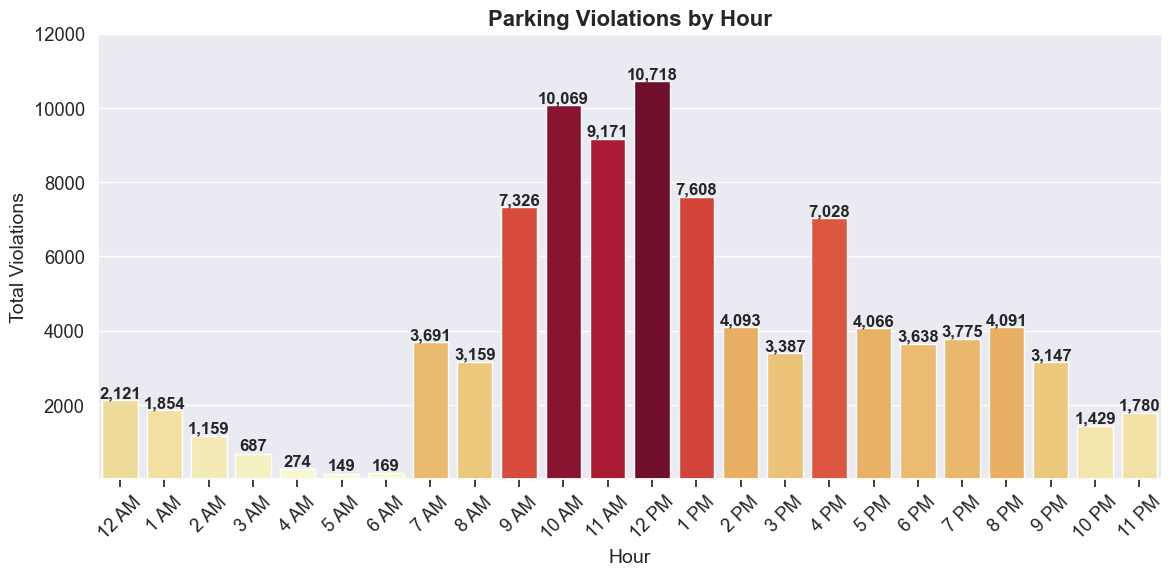

In [244]:
valueCountBarPlot('hour', 'Parking Violations by Hour', 'Hour', 'Total Violations', 'parking_violations_by_hour.png')

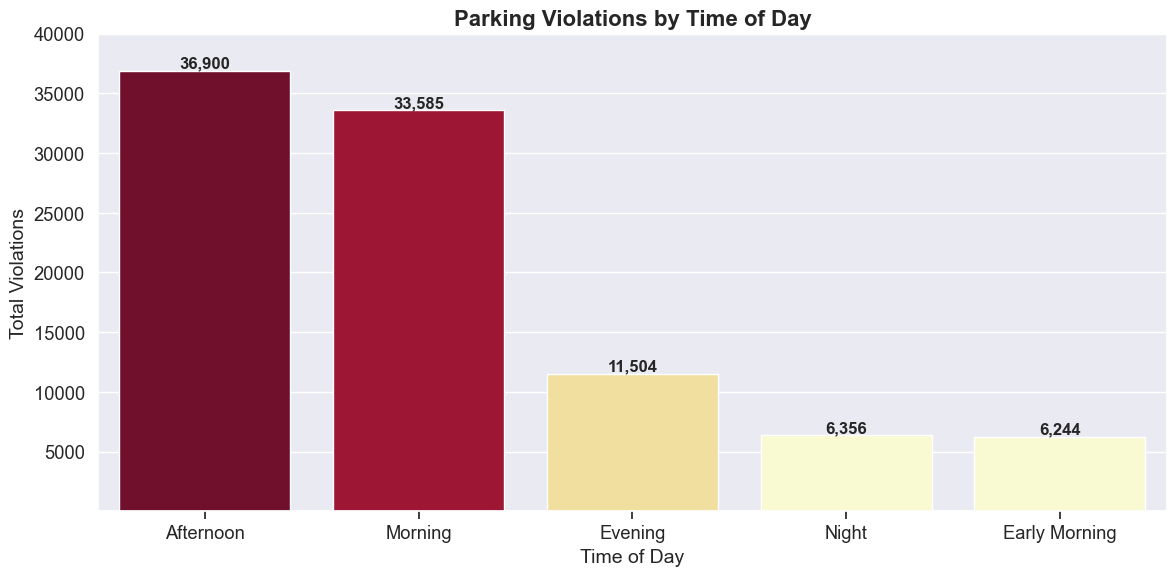

In [245]:
valueCountBarPlot('time_of_day', 'Parking Violations by Time of Day', 'Time of Day', 'Total Violations', 'parking_violations_by_time_of_day.png')